## HW_3 Прогнозирование биологического ответа

In [1]:
#импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные моделиё
from sklearn import tree #деревья решений
from sklearn import ensemble #ансамбли
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn import model_selection #методы разделения и валидации
from sklearn.model_selection import train_test_split #сплитование выборки

#### 1. Знакомство с данными

In [2]:

data = pd.read_csv('data/_train_sem09.csv')
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


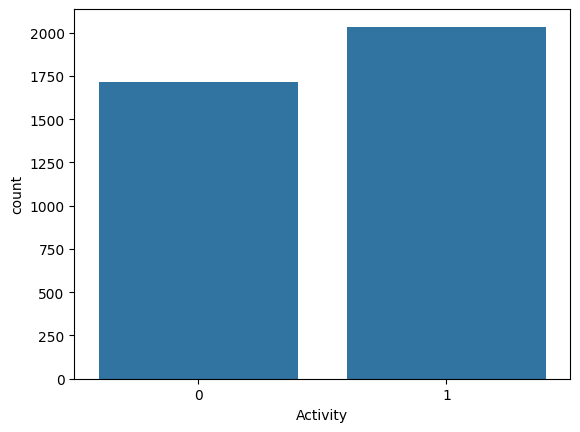

In [3]:
# Проверяем сбалансированность классов
sns.countplot(data=data, x='Activity');

Данные в выборке сбалансированы, стратифицированное разбиение не требуется.

#### 2. Подготовка данных

In [4]:
X = data.drop(['Activity'], axis=1)
y = data['Activity']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

### 3. Оптимизация гиперпараметров модели.
#### 3.1. Логистичекая регрессия

In [6]:
# Обучаем модель логистической регрессии, делаем предсказание на тестовой выборке, фиксируем значение F1
log_reg = linear_model.LogisticRegression(random_state=5, max_iter=50)
log_reg.fit(X_train, y_train)
y_test_pred = log_reg.predict(X_test)
print('F1 score на тестовой выборке:{:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))


F1 score на тестовой выборке:0.79


C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
# Обучаем модель логистической регрессии с кросс-валидацией, фиксируем значение F1
log_reg_cross = linear_model.LogisticRegression(random_state=5, max_iter=50)
kf = model_selection.KFold(n_splits = 10)
cv_metrics = model_selection.cross_validate(
    estimator=log_reg_cross,
    X=X,
    y=y,
    cv=kf,
    scoring='f1'
    )
print('Среднее значение F1 на тестовой выборке:{:.2f}'.format(np.mean(cv_metrics['test_score'])))
        

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.

Среднее значение F1 на тестовой выборке:0.78


C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Значение f1 на тестовой выборке при использовании кросс-валидации незначительно снизилось.

#### 3.1.1 GridSearchCV

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
# создаем список гиперпараметров
param_grid = [{'penalty':['l2', 'none'],
              'solver': ['lbfgs', 'sag'],
              'C': list(np.linspace(0.1, 1, 10, dtype=float))},
              {'penalty':['l2', 'l1'],
              'solver': ['liblinear', 'saga'],
              'C': list(np.linspace(0.1, 1, 10, dtype=float))}
]
# Обучаем модель логистической регрессии с GridSearch, делаем предсказание, фиксируем значение F1 и наилучшие значения гиперпараметров
grid_search = GridSearchCV(
    estimator=linear_model.LogisticRegression(
        random_state=5,
        max_iter=50    
    ),
    param_grid=param_grid,
    cv=10,
    n_jobs=-1
)
%time grid_search.fit(X_train, y_train)
y_test_pred_grid = grid_search.predict(X_test)
print('F1 на тестовом наборе:{:.2f}'.format(metrics.f1_score(y_test, y_test_pred_grid)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
200 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCa

CPU times: total: 14.9 s
Wall time: 4min 41s
F1 на тестовом наборе:0.79
Наилучшие значения гиперпараметров: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Значение метрики f1 повысить не удалось.

### 3.1.2 RandomizedSearchCV

In [10]:
from sklearn.model_selection import RandomizedSearchCV

In [11]:
# создаем список гиперпараметров
param_random = {'penalty':['l2', 'l1'],
              'solver': ['liblinear', 'saga'],
               'C': list(np.linspace(0.01, 1, 10, dtype=float))
               }
# Обучаем модель логистической регрессии с RandomizedSearch, делаем предсказание, фиксируем значение F1 и наилучшие значения гиперпараметров
random_search = RandomizedSearchCV(
    estimator=linear_model.LogisticRegression(
        random_state=5,
        max_iter=50
    ),
    param_distributions=param_random,
    cv=10,
    n_iter=5,
    n_jobs=-1
)
%time random_search.fit(X_train, y_train)
y_test_pred_random = random_search.predict(X_test)
print('F1 на тестовом наборе:{:.2f}'.format(metrics.f1_score(y_test, y_test_pred_random)))
print("Наилучшие значения гиперпараметров: {}".format(random_search.best_params_))

CPU times: total: 3.33 s
Wall time: 25.9 s
F1 на тестовом наборе:0.79
Наилучшие значения гиперпараметров: {'solver': 'saga', 'penalty': 'l2', 'C': 0.23}


C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Значение метрики f1 повысить не удалось, но времени затрачено намного меньше чем, при использовании GridSearchCV

### 3.1.3 Hyperopt

In [12]:
from sklearn.model_selection import cross_val_score
import hyperopt
from hyperopt import hp, fmin, tpe, Trials, space_eval

In [13]:
# задаем пространство поиска гиперпараметров
space = {'penalty':hp.choice('penalty', ['l2', 'l1']),
         'solver':hp.choice('solver', ['liblinear', 'saga']),
         'C':hp.uniform('C', 0.1, 1)
         }

In [14]:
# зафксируем random_state
random_state = 5

def hyperopt_lr(params, cv=10, X=X_train, y=y_train, random_state=random_state):
   """ Функция, обучающая модель LogisticRegression
    по переданным гиперпараметрам
    
  Args:
      params: комбинация гиперпараметров, 
      cv: количество фолдов кросс-валидации, 
      X: матрица наблюдений, 
      y: вектор меток объектов, 
      random_state: случайное число для воспроизводимости

  Returns:
      -score: минимизированная метрика f1
      """
    
   params = {'penalty': str(params['penalty']), 
              'solver': str(params['solver']), 
             'C': float(params['C'])
              }
   model = linear_model.LogisticRegression(**params, random_state=random_state)
   model.fit(X, y)
   score = cross_val_score(model, X, y, cv=cv, scoring="f1", n_jobs=-1).mean()
   return -score

In [15]:
%%time
# подбор гиперпараметров
best = fmin(hyperopt_lr,
            space=space,
            max_evals=50,
            rstate=np.random.default_rng(random_state))
print('Наилучшие значения гиперпараметров {}'.format(space_eval(space, best)))

TPE is being used as the default algorithm.


  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  6%|▌         | 3/50 [00:31<06:25,  8.20s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 16%|█▌        | 8/50 [01:04<03:47,  5.42s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 20%|██        | 10/50 [01:25<05:00,  7.51s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 22%|██▏       | 11/50 [01:49<08:02, 12.37s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 24%|██▍       | 12/50 [02:15<10:27, 16.52s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 32%|███▏      | 16/50 [02:44<04:45,  8.41s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 40%|████      | 20/50 [03:13<03:06,  6.20s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 42%|████▏     | 21/50 [03:31<04:43,  9.77s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 44%|████▍     | 22/50 [03:54<06:25, 13.75s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 46%|████▌     | 23/50 [04:19<07:43, 17.17s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 48%|████▊     | 24/50 [04:37<07:33, 17.43s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 50%|█████     | 25/50 [04:55<07:20, 17.62s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 52%|█████▏    | 26/50 [05:18<07:43, 19.33s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 54%|█████▍    | 27/50 [05:43<08:03, 21.01s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 56%|█████▌    | 28/50 [06:01<07:21, 20.06s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 58%|█████▊    | 29/50 [06:24<07:21, 21.03s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 60%|██████    | 30/50 [06:42<06:42, 20.14s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 62%|██████▏   | 31/50 [07:07<06:49, 21.53s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 64%|██████▍   | 32/50 [07:25<06:09, 20.50s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 66%|██████▌   | 33/50 [07:48<06:01, 21.25s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 68%|██████▊   | 34/50 [08:06<05:24, 20.26s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 70%|███████   | 35/50 [08:24<04:53, 19.54s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 72%|███████▏  | 36/50 [08:49<04:55, 21.09s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 74%|███████▍  | 37/50 [09:07<04:22, 20.20s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 76%|███████▌  | 38/50 [09:25<03:55, 19.64s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 78%|███████▊  | 39/50 [09:48<03:46, 20.61s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 80%|████████  | 40/50 [10:06<03:18, 19.86s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 82%|████████▏ | 41/50 [10:24<02:54, 19.35s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 84%|████████▍ | 42/50 [10:52<02:53, 21.66s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 88%|████████▊ | 44/50 [11:14<01:34, 15.77s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 92%|█████████▏| 46/50 [11:34<00:47, 11.97s/trial, best loss: -0.7879700695936037]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 94%|█████████▍| 47/50 [11:58<00:47, 15.78s/trial, best loss: -0.7879700695936037]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 98%|█████████▊| 49/50 [12:20<00:12, 12.45s/trial, best loss: -0.7879700695936037]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



100%|██████████| 50/50 [12:38<00:00, 15.16s/trial, best loss: -0.7879700695936037]
Наилучшие значения гиперпараметров {'C': 0.10059073210640976, 'penalty': 'l2', 'solver': 'saga'}
CPU times: total: 3min 23s
Wall time: 12min 38s


In [17]:
# обучаем модель с подобранными гиперпараметрами, делаем предсказание
model_ho = linear_model.LogisticRegression(
    penalty=space_eval(space, best)['penalty'],
    solver=space_eval(space, best)['solver'],
    C = float(best['C']),
    random_state=random_state,
    max_iter=50
)
score_ho = cross_val_score(model_ho, X, y, cv=10, scoring="f1", n_jobs=-1).mean()
print('f1_score: {:.2f}'.format(score_ho))

f1_score: 0.79


Значение метрики f1 не изменилось.

### 3.1.4 Optuna

In [18]:
import optuna

In [19]:
def optuna_lr(trial):
  
  """Функция, обучающая модель LogisticRegression
    по переданным гиперпараметрам

  Args:
      trial : класс, от которого вызываются гиперпараметры

  Returns:
      score(float): метрика F1
      """
      
  penalty = trial.suggest_categorical('penalty', ['l2', 'l1'])
  solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])
  C = trial.suggest_float('C', 0.1, 1)

  # создаем модель
  model = linear_model.LogisticRegression(penalty=penalty,
                                          solver=solver,
                                          C=C,
                                          random_state=random_state,
                                          max_iter=50)
  # обучаем модель
  score = cross_val_score(model, X, y, cv=10, scoring="f1", n_jobs=-1).mean()
  
  return score

In [20]:
%%time
# создаем объект исследования и ищем лучшую комбинацию гиперпараметров
study = optuna.create_study(study_name = 'LogisticRegression', direction = 'maximize')
study.optimize(optuna_lr, n_trials = 50)
print("Наилучшие значения гиперпараметров {}".format(study.best_params))

[I 2024-05-16 13:38:01,184] A new study created in memory with name: LogisticRegression


[I 2024-05-16 13:38:10,264] Trial 0 finished with value: 0.7830050428030485 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.6518740373151405}. Best is trial 0 with value: 0.7830050428030485.
[I 2024-05-16 13:38:14,374] Trial 1 finished with value: 0.7800079997855309 and parameters: {'penalty': 'l2', 'solver': 'liblinear', 'C': 0.37101311805523896}. Best is trial 0 with value: 0.7830050428030485.
[I 2024-05-16 13:38:23,552] Trial 2 finished with value: 0.7820826804402795 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.9689863556958274}. Best is trial 0 with value: 0.7830050428030485.
[I 2024-05-16 13:38:26,368] Trial 3 finished with value: 0.7891179825772263 and parameters: {'penalty': 'l1', 'solver': 'liblinear', 'C': 0.312443325704164}. Best is trial 3 with value: 0.7891179825772263.
[I 2024-05-16 13:38:29,700] Trial 4 finished with value: 0.7854164198778688 and parameters: {'penalty': 'l1', 'solver': 'liblinear', 'C': 0.8014738218507977}. Best is trial 3 with va

Наилучшие значения гиперпараметров {'penalty': 'l1', 'solver': 'liblinear', 'C': 0.312443325704164}
CPU times: total: 12.1 s
Wall time: 7min 18s


In [25]:
# Обучаем модель и делаем предсказание
model_opt = linear_model.LogisticRegression(**study.best_params, random_state = random_state)
score_opt = cross_val_score(model_opt, X, y, cv=10, scoring="f1", n_jobs=-1).mean()
print('f1_score: {:.2f}'.format(score_opt ))

f1_score: 0.79


Значение метрики f1 не изменилось.

Все представленные модели показали одинаковое значение метрики F1 - 0.79 - такое же, как при построении модели Логистической регрессии с параметрами по умолчанию. В данном случае подбор гиперпараметров раздичными способами не привел к увеличению метрики.

### 3.2 Случайный лес

In [22]:
# Обучаем модель случайный лес, делаем предсказание на тестовой выборке, фиксируем значение F1
model_rf = ensemble.RandomForestClassifier(random_state=5)
model_rf.fit(X_train, y_train)
y_test_pred_rf = model_rf.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred_rf)))

f1_score на тестовом наборе: 0.83


По сравнению с логистической регрессией метрика F1 улучшилась при использовании случайного леса, даже без подбора гиперпараметров.

In [23]:
# Обучаем модель случайный лес с кросс-валидацией, делаем предсказание на тестовой выборке, фиксируем значение F1
model_rf_cross = ensemble.RandomForestClassifier(random_state=5)
kf = model_selection.KFold(n_splits=10)
cv_rf_metrics = model_selection.cross_validate(
    estimator=model_rf_cross,
    X=X,
    y=y,
    cv=kf,
    scoring='f1'
)
print('Среднее значение F1 на тестовой выборке:{:.2f}'.format(np.mean(cv_rf_metrics['test_score'])))

Среднее значение F1 на тестовой выборке:0.81


Использование кросс-валидации не помогло уведичить значение метрики f1.

#### 3.2.1 GridSearchCV

In [26]:
# создаем список гиперпараметров
param_grid_rf = {'n_estimators':list(range(60, 200, 20)),
               'criterion':['entropy','gini'],
               'max_depth': list(np.linspace(5, 30, 5, dtype=int)),
               'min_samples_leaf': list(range(2, 10, 2))
               }


# Обучаем модель слуйчайного леса с GridSearch, делаем предсказание, фиксируем значение F1 и наилучшие значения гиперпараметров
grid_search_rf = GridSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state=5),
    param_grid=param_grid_rf,
    cv=10,
    n_jobs=-1
)
%time grid_search_rf.fit(X_train, y_train)
y_test_pred_grid_rf = grid_search_rf.predict(X_test)
print('F1 на тестовом наборе:{:.2f}'.format(metrics.f1_score(y_test, y_test_pred_grid_rf)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search_rf.best_params_))

CPU times: total: 41.5 s
Wall time: 19min 55s
F1 на тестовом наборе:0.84
Наилучшие значения гиперпараметров: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 2, 'n_estimators': 180}


F1 при использовании GridSearchCV удалось немного повысить, при этом было затрачено в разы больше времени.

### 3.2.2 RandomizedSearchCV

In [27]:
# создаем список гиперпараметров
param_random_rf = {'n_estimators':list(range(60, 200, 20)),
               'criterion':['entropy','gini'],
               'max_depth': list(np.linspace(5, 30, 5, dtype=int)),
               'min_samples_leaf': list(range(2, 10, 2))
               }
# Обучаем модель логистической регрессии с RandomizedSearch, делаем предсказание, фиксируем значение F1 и наилучшие значения гиперпараметров
random_search_rf = RandomizedSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state=5),
    param_distributions=param_random_rf,
    cv=10,
    n_iter=5,
    n_jobs=-1
)
%time random_search_rf.fit(X_train, y_train)
y_test_pred_random_rf = random_search_rf.predict(X_test)
print('F1 на тестовом наборе:{:.2f}'.format(metrics.f1_score(y_test, y_test_pred_random_rf)))
print("Наилучшие значения гиперпараметров: {}".format(random_search_rf.best_params_))

CPU times: total: 1.77 s
Wall time: 26 s
F1 на тестовом наборе:0.83
Наилучшие значения гиперпараметров: {'n_estimators': 60, 'min_samples_leaf': 6, 'max_depth': 30, 'criterion': 'entropy'}


Значение метрики f1 повысить не удалось.

### 3.2.3 Hyperopt

In [28]:
# зададим пространство поиска гиперпараметров
space_rf={'n_estimators': hp.quniform('n_estimators', 60, 200, 2),
       'max_depth' : hp.quniform('max_depth', 5, 30, 2),
       'min_samples_leaf': hp.quniform('min_samples_leaf', 2, 10, 1),
       'criterion': hp.choice('criterion', ['entropy','gini'])
      }

In [29]:
# зафксируем random_state
random_state = 5

def hyperopt_rf(params, cv=10, X=X_train, y=y_train, random_state=random_state):
    """ Функция, обучающая модель RandomForestClassifier
    по переданным гиперпараметрам
    
  Args:
      params: комбинация гиперпараметров, 
      cv: количество фолдов кросс-валидации, 
      X: матрица наблюдений, 
      y: вектор меток объектов, 
      random_state: случайное число для воспроизводимости

  Returns:
      -score: минимизированная метрика f1
      """
    
    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth']), 
             'min_samples_leaf': int(params['min_samples_leaf']),
             'criterion': str(params['criterion'])
              }
  
    # используем эту комбинацию для построения модели
    model = ensemble.RandomForestClassifier(**params, random_state=random_state)

    # обучаем модель с помощью кросс-валидации
    model.fit(X, y)
    score = cross_val_score(model, X, y, cv=cv, scoring="f1", n_jobs=-1).mean()

    # метрику необходимо минимизировать, поэтому ставим знак минус
    return -score

In [30]:
%time
# подбор гиперпараметров
best_rf = fmin(hyperopt_rf,
            space=space_rf,
            max_evals=50,
            rstate=np.random.default_rng(random_state))
print('Наилучшие значения гиперпараметров {}'.format(space_eval(space_rf, best_rf)))

TPE is being used as the default algorithm.


CPU times: total: 0 ns
Wall time: 0 ns
100%|██████████| 50/50 [07:04<00:00,  8.48s/trial, best loss: -0.821904169192593] 
Наилучшие значения гиперпараметров {'criterion': 'gini', 'max_depth': 28.0, 'min_samples_leaf': 2.0, 'n_estimators': 138.0}


In [31]:
# обучаем модель с подобранными гиперпараметрами, делаем предсказание
model_ho_rf = ensemble.RandomForestClassifier(
    n_estimators=int(best_rf['n_estimators']),
    max_depth=int(best_rf['max_depth']),
    min_samples_leaf = int(best_rf['min_samples_leaf']),
    criterion=space_eval(space_rf, best_rf)['criterion'],
    random_state=random_state
)
score_rf_ho_rf = cross_val_score(model_ho_rf, X, y, cv=10, scoring="f1", n_jobs=-1).mean()
print('f1_score: {:.2f}'.format(score_rf_ho_rf))

f1_score: 0.82


F1 при использовании hyperopt улучшить не удалось.

### 3.2.4 Optuna

In [32]:
def optuna_rf(trial):
  
  """Функция, обучающая модель RandomForestClassifier
    по переданным гиперпараметрам

  Args:
      trial : класс, от которого вызываются гиперпараметры

  Returns:
      score(float): метрика F1
      """
  
  n_estimators = trial.suggest_int('n_estimators', 60, 200, 2)
  max_depth = trial.suggest_int('max_depth', 5, 30, 2)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)
  criterion = trial.suggest_categorical('criterion', ['entropy','gini'])

  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=random_state)
  # обучаем модель
  model.fit(X_train, y_train)
  score = cross_val_score(model, X, y, cv=10, scoring="f1", n_jobs=-1).mean()

  return score

In [33]:
%time
# создаем объект исследования и ищем лучшую комбинацию гиперпараметров
study_rf = optuna.create_study(study_name = 'RandomForestClassifier', direction = 'maximize')
study_rf.optimize(optuna_rf, n_trials = 50)
print("Наилучшие значения гиперпараметров {}".format(study_rf.best_params))

[I 2024-05-16 14:39:57,050] A new study created in memory with name: RandomForestClassifier


CPU times: total: 0 ns
Wall time: 0 ns


C:\Users\Настенька\AppData\Local\Temp\ipykernel_12180\2944656874.py:13: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  n_estimators = trial.suggest_int('n_estimators', 60, 200, 2)
C:\Users\Настенька\AppData\Local\Temp\ipykernel_12180\2944656874.py:14: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  max_depth = trial.suggest_int('max_depth', 5, 30, 2)
C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 30] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 29].
  warnings.warn(
C:\Users\Настенька\AppData\Local\Temp\ipykernel_12180\2944656874.py:15: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to

Наилучшие значения гиперпараметров {'n_estimators': 168, 'max_depth': 23, 'min_samples_leaf': 4, 'criterion': 'entropy'}


In [34]:
# Обучаем модель и делаем предсказание
model_opt_rf = ensemble.RandomForestClassifier(**study_rf.best_params, random_state = random_state)
score_opt_rf = cross_val_score(model_opt_rf, X, y, cv=10, scoring="f1", n_jobs=-1).mean()
print('f1_score: {:.2f}'.format(score_opt_rf))

f1_score: 0.82


Снова не удалось повысить f1 при достаточно большом количестве затраченного времени.

Таким образом, из всех представленных моделей самое высокое значение f1 равно 0.84 было достигнуто в модели Случайного леса с использованием GridSearchCV, при этом данная модель затратила наибольшее количество времени. Наилучшие значения гиперпараметров: 'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 2, 'n_estimators': 180.